# Loan Approval Prediction based on Machine Learning Approach 

### Library Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Using Pandas Loading a Dataset

In [2]:
df=pd.read_csv("train_loanPrediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Pre Processing

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df1=df.dropna()

In [9]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0, 0.5, 'No.of App')

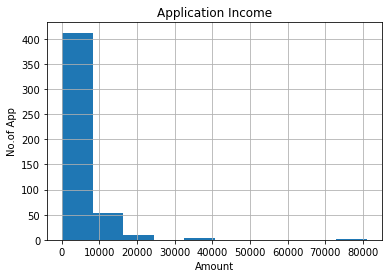

In [10]:
df1['ApplicantIncome'].hist(bins=10)
plt.title("Application Income")
plt.xlabel('Amount')
plt.ylabel('No.of App')

Text(0, 0.5, 'No.of CoApp')

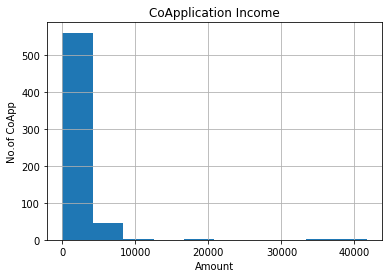

In [11]:
df['CoapplicantIncome'].hist(bins=10)
plt.title("CoApplication Income")
plt.xlabel('Amount')
plt.ylabel('No.of CoApp')

Text(0, 0.5, 'No.of CoApp')

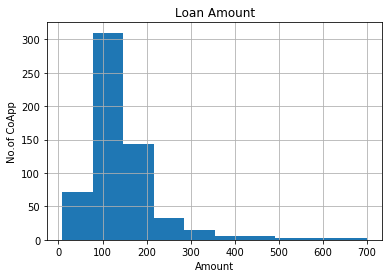

In [12]:
df['LoanAmount'].hist(bins=10) 
plt.title("Loan Amount")
plt.xlabel('Amount')
plt.ylabel('No.of CoApp')

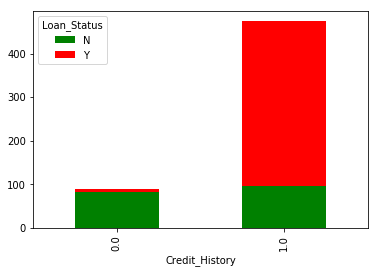

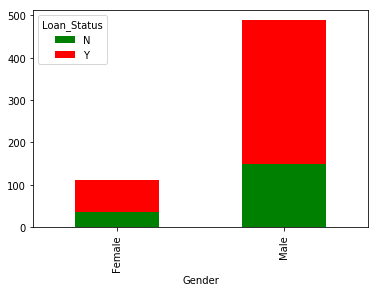

In [13]:
#combining the above 2 plots in a stacked chart
stack_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','red'], grid=False)
stack_chart = pd.crosstab(df['Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

Text(0.5, 0, 'Amount')

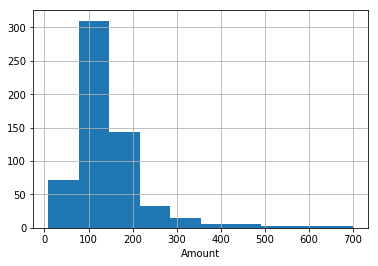

In [14]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount'].hist(bins=10) 
plt.xlabel('Amount')


In [15]:
df2=df1.drop(["Loan_ID"],axis=1)

### LabelEncoder

In [16]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [17]:
df2['LGender'] = le.fit_transform(df2['Gender'].values.reshape(-1,1).ravel())
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1


In [18]:
df2['LMarried']=le.fit_transform(df2['Married'].values.reshape(-1,1).ravel())
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1


In [19]:
df2['LSelf_Employed']=le.fit_transform(df2["Self_Employed"].values.reshape(-1,1).ravel())

In [20]:
df2['LLoan_Status']=le.fit_transform(df2["Loan_Status"].values.reshape(-1,1).ravel())

In [21]:
df2['LEducation']=le.fit_transform(df2["Education"].values.reshape(-1,1).ravel())

In [22]:
df2['LProperty_Area']=le.fit_transform(df2["Property_Area"].values.reshape(-1,1).ravel())
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried,LSelf_Employed,LLoan_Status,LEducation,LProperty_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,0,2
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1,1,2
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,0,2
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1,0,2


In [23]:
df2=df2.drop(["Self_Employed"],axis=1)
df2=df2.drop(["Loan_Status"],axis=1)
df2=df2.drop(["Property_Area"],axis=1)
df2=df2.drop(["Married"],axis=1)
df2=df2.drop(["Gender"],axis=1)
df2=df2.drop(["Education"],axis=1)
df2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LGender,LMarried,LSelf_Employed,LLoan_Status,LEducation,LProperty_Area
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,2
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1,2
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,2
5,2.0,5417,4196.0,267.0,360.0,1.0,1,1,1,1,0,2


### Classification

In [24]:
x=df2.iloc[:,df2.columns !='LLoan_Status']
y=df2.iloc[:,df2.columns =='LLoan_Status']

In [25]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LGender,LMarried,LSelf_Employed,LEducation,LProperty_Area
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,1,0,2
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,2
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,2
5,2.0,5417,4196.0,267.0,360.0,1.0,1,1,1,0,2


In [26]:
y.head()

,LLoan_Status
1,0
2,1
3,1
4,1
5,1


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [29]:
x_train.shape

(336, 11)

In [30]:
y_test.shape

(144, 1)

In [31]:
np1=df2.values

# Training the Algorithams

#### 1.SVM-Support Vector Machine

In [32]:
from sklearn import svm
from sklearn import metrics

In [33]:
model1=svm.SVC()

In [34]:
model1.fit(x_train,y_train)

C:\Users\ML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ML\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
xpredict=model1.predict(x_test)

In [36]:
svm=metrics.accuracy_score(y_test,xpredict)
print(svm)

0.7291666666666666


In [37]:
svm=model1.score(x_test,y_test)
svm

0.7291666666666666

### 2.LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [39]:
model2.fit(x_train,y_train)

C:\Users\ML\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
xpredict=model2.predict(x_test)

In [41]:
lr=metrics.accuracy_score(y_test,xpredict)
print(lr)

0.7986111111111112


### 3.Decision Tree algorithm 

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model3=DecisionTreeClassifier()

In [44]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
xpredict=model3.predict(x_test)

In [46]:
dt=metrics.accuracy_score(y_test,xpredict)
print(dt)

0.7430555555555556


# Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
model4=GaussianNB()

In [49]:
model4.fit(x_train,y_train)

C:\Users\ML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
xpredict=model4.predict(x_test)

In [51]:
nv=metrics.accuracy_score(y_test,xpredict)
print(dt)

0.7430555555555556


 # Graph_Comparision

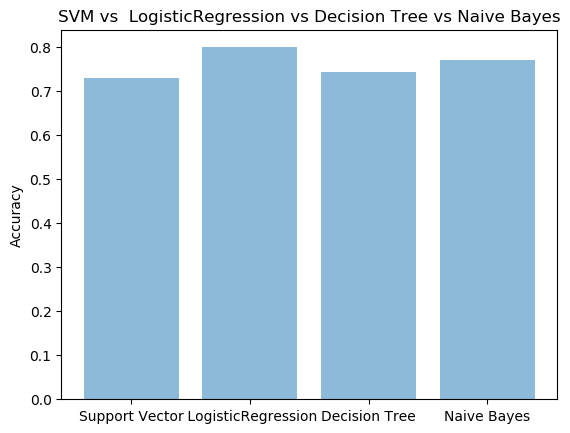

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Support Vector',' LogisticRegression','Decision Tree' , 'Naive Bayes')
y_pos = np.arange(len(objects))
performance = [svm,lr,dt,nv]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('SVM vs  LogisticRegression vs Decision Tree vs Naive Bayes')

plt.show()